In [8]:
import pandas as pd

# Loading the dataset
data = pd.read_csv('data_restructured.csv')


# Converting all integer columns to Int64 type (nullable integer type)
int_columns = data.select_dtypes(include=['int64']).columns

# Converting to Int64 to handle possible missing values in a more flexible way
data[int_columns] = data[int_columns].astype('Int64')

# Verifying the conversion to Int64
print(data.dtypes[int_columns])

# (1) Removing outliers from the entire dataset based on the 'Price' column
def remove_outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return dataframe[(dataframe[column] >= lower_bound) & (dataframe[column] <= upper_bound)]

# Removing outliers in the 'Price' column
data_outliers_removed = remove_outliers(data, 'Price')

# (2) Creating dataframe for subpropertytype 'HOUSE'
houses_df = data_outliers_removed[data_outliers_removed['PropertySubtype'] == 'HOUSE']

# (3) Creating dataframe for subpropertytype 'APARTMENT'
apartments_df = data_outliers_removed[data_outliers_removed['PropertySubtype'] == 'APARTMENT']

# Displaying the shapes of each DataFrame
print("Shape of Original DataFrame:", data.shape)
print("Shape of DataFrame without Outliers:", data_outliers_removed.shape)
print("Shape of House DataFrame (without outliers):", houses_df.shape)
print("Shape of Apartment DataFrame (without outliers):", apartments_df.shape)

# Displaying information about the original data
data.info()


FileNotFoundError: [Errno 2] No such file or directory: 'data_restructured.csv'

Missing values per unique dataframe created 

In [189]:
# (1) Calculate missing values percentage for the original dataset
missing_values_original_pct = data_outliers_removed.isnull().mean() * 100
# (2) For the houses DataFrame
missing_values_house_pct = houses_df.isnull().mean() * 100
# (3) For the apartments DataFrame
missing_values_apartment_pct = apartments_df.isnull().mean() * 100
# Sorting missing values percentage in descending order
missing_values_original_pct_desc = missing_values_original_pct.sort_values(ascending=False)
missing_values_house_pct_desc = missing_values_house_pct.sort_values(ascending=False)
missing_values_apartment_pct_desc = missing_values_apartment_pct.sort_values(ascending=False)

# Filtering for columns with more than 20% missing values

more_than_20_pct_original = missing_values_original_pct_desc[missing_values_original_pct_desc > 20]
more_than_20_pct_house = missing_values_house_pct_desc[missing_values_house_pct_desc > 20]
more_than_20_pct_apartment = missing_values_apartment_pct_desc[missing_values_apartment_pct_desc > 20]

# Display the results
print("More than 20% missing values in original dataset") 
print(more_than_20_pct_original)

More than 20% missing values in original dataset
Garden_Area         81.867617
LandWidth           56.347272
LandSurface         56.347272
Terrace_Area        54.228389
FloorCount          38.102381
ConstructionYear    31.426964
KitchenType         30.564410
FacadeCount         26.514157
StateBuilding       22.445153
dtype: float64


In [190]:
print("Columns with more than 20% missing values in the house dataset:")
print(more_than_20_pct_house)

Columns with more than 20% missing values in the house dataset:
Terrace_Area        72.067649
Garden_Area         67.321331
FloorCount          57.719585
ConstructionYear    36.224768
KitchenType         36.006547
FacadeCount         23.022368
StateBuilding       21.603928
dtype: float64


In [191]:
print("Columns with more than 20% missing values in the apartment dataset:")
print(more_than_20_pct_apartment)

Columns with more than 20% missing values in the apartment dataset:
LandSurface         100.000000
LandWidth           100.000000
Garden_Area          95.195330
Terrace_Area         40.772339
FacadeCount          30.489448
ConstructionYear     27.705433
KitchenType          25.909295
FloorCount           24.651998
StateBuilding        22.721150
dtype: float64


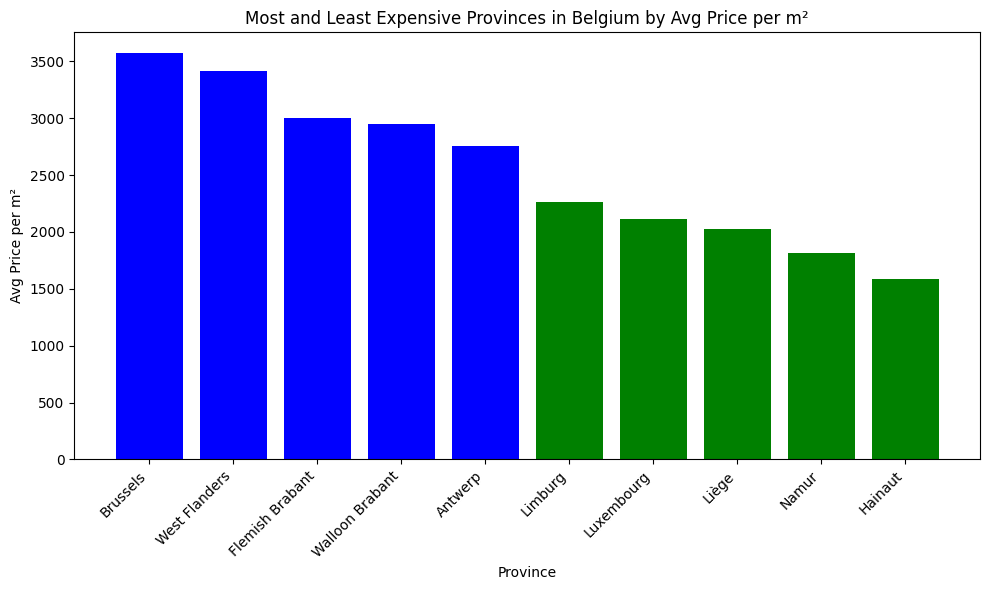

In [192]:
data['Price_per_m2'] = data['Price'] / data['LivingArea']
municipality_stats = data.groupby('Province').agg(
    avg_price=('Price', 'mean'),
    median_price=('Price', 'median'),
    avg_price_per_m2=('Price_per_m2', 'mean')
).sort_values(by='avg_price_per_m2', ascending=False)

# Getting most and least expensive data
most_expensive_belgium = municipality_stats.head(5)
least_expensive_belgium = municipality_stats.tail(5)

# Combining the data for plotting
combined_data = pd.concat([most_expensive_belgium, least_expensive_belgium])

# Plotting in one graph
fig, ax = plt.subplots(figsize=(10, 6))

# Bar chart for combined most and least expensive provinces
ax.bar(combined_data.index, combined_data['avg_price_per_m2'], color=['blue' if i < 5 else 'green' for i in range(len(combined_data))])

# Add titles and labels
ax.set_title('Most and Least Expensive Provinces in Belgium by Avg Price per m²')
ax.set_xlabel('Province')
ax.set_ylabel('Avg Price per m²')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

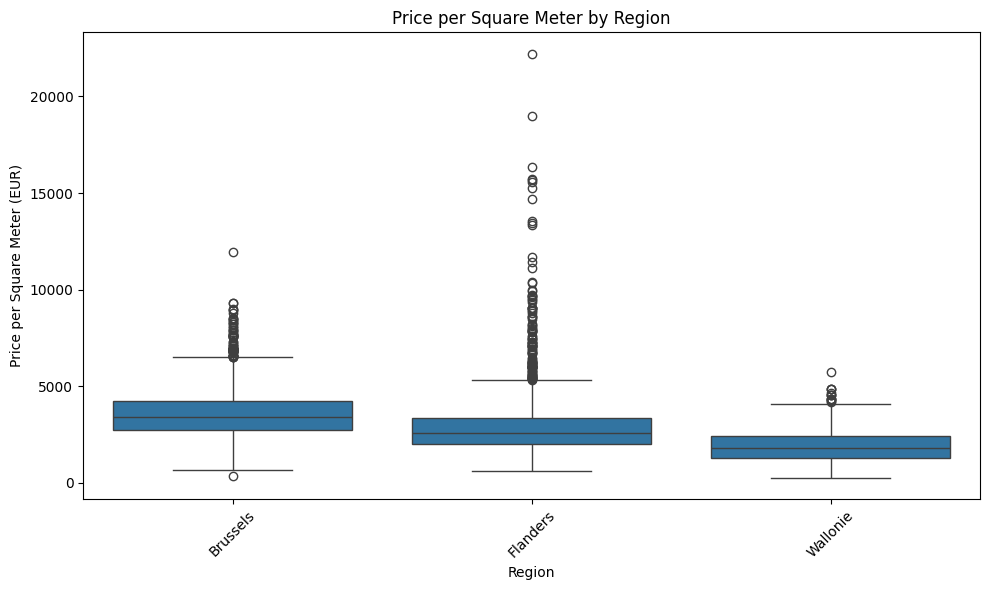

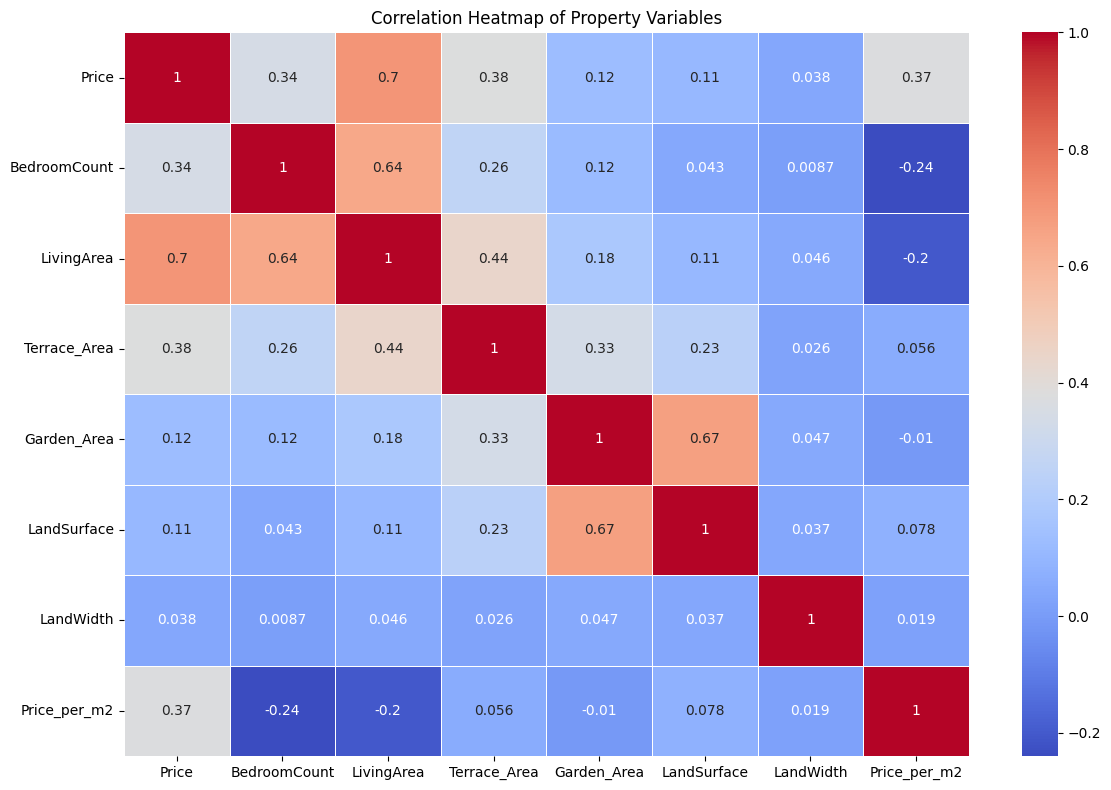

In [193]:
import seaborn as sns

# 1. Price per Square Meter Calculation
data['Price_per_m2'] = data['Price'] / data['LivingArea']

plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Price_per_m2', data=data)
plt.title('Price per Square Meter by Region')
plt.ylabel('Price per Square Meter (EUR)')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Correlation Heatmap for Numerical Variables
plt.figure(figsize=(12, 8))
numerical_columns = ['Price', 'BedroomCount', 'LivingArea', 'Terrace_Area', 'Garden_Area', 'LandSurface', 'LandWidth', 'Price_per_m2']
corr_matrix = data[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Property Variables')
plt.tight_layout()
plt.show()


In [6]:
import matplotlib.pyplot as plt

# Step 1: Calculate price per m² 
data['Price_per_m2'] = data['Price'] / data['LivingArea']

# Step 2: Group by 'District' (municipality) and calculate average, median, and average price per m²
municipality_stats = data.groupby('District').agg(
    avg_price=('Price', 'mean'),
    median_price=('Price', 'median'),
    avg_price_per_m2=('Price_per_m2', 'mean')
).sort_values(by='avg_price_per_m2', ascending=False)

# Step 3: Extract the top and bottom 5 municipalities for Belgium
most_expensive_belgium = municipality_stats.head(5)
least_expensive_belgium = municipality_stats.tail(5)

# Step 4: Visualize most and least expensive municipalities (Price per m²)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot for most expensive
most_expensive_belgium['avg_price_per_m2'].plot(kind='bar', ax=ax[0], color='green')
ax[0].set_title('Most Expensive Municipalities in Belgium (Price per m²)')
ax[0].set_ylabel('Average Price per m² (EUR)')
ax[0].set_xlabel('Municipality')
ax[0].tick_params(axis='x', rotation=45)

# Plot for least expensive
least_expensive_belgium['avg_price_per_m2'].plot(kind='bar', ax=ax[1], color='red')
ax[1].set_title('Least Expensive Municipalities in Belgium (Price per m²)')
ax[1].set_ylabel('Average Price per m² (EUR)')
ax[1].set_xlabel('Municipality')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



# Calculate the average price per square meter for each region
region_stats = data.groupby('Region').agg(
    avg_price_per_m2=('Price_per_m2', 'mean'),
    median_price_per_m2=('Price_per_m2', 'median')
)

NameError: name 'data' is not defined

In [195]:
# Calculate the average price per square meter for each region
region_stats = data.groupby('Region').agg(
    avg_price_per_m2=('Price_per_m2', 'mean'),
    median_price_per_m2=('Price_per_m2', 'median'))
print(region_stats)

          avg_price_per_m2  median_price_per_m2
Region                                         
Brussels       3576.490551          3409.090909
Flanders       2926.151653          2598.666667
Wallonie       1941.381861              1781.25


In [206]:
# Display the first few rows of each
print(apartments_df.head())
print(houses_df.head())


    Property ID    Region       Province  District       Locality  PostalCode  \
5      20233131  Brussels       Brussels  Brussels        Ixelles        1050   
6      20226645  Brussels       Brussels  Brussels        Brussel        1000   
8      20240570  Brussels       Brussels  Brussels          Evere        1140   
10     20243133  Flanders  West Flanders    Brugge   Blankenberge        8370   
12     20226743  Brussels       Brussels  Brussels  Brussels City        1000   

                            Street   Price PropertyType PropertySubtype  ...  \
5   Rue Du Relais - Pleisterstraat  395000    APARTMENT       APARTMENT  ...   
6                         Hooikaai  455000    APARTMENT       APARTMENT  ...   
8        Avenue de l'Oud-Kapelleke  235000    APARTMENT       APARTMENT  ...   
10                      Kerkstraat  189000    APARTMENT       APARTMENT  ...   
12                             NaN  650000    APARTMENT       APARTMENT  ...   

    LivingArea Terrace_Area Gard

C:\Users\Becode-son\AppData\Local\Temp\ipykernel_12600\2822907416.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'Count: {apartment_count[i]}', ha='center', va='bottom', fontsize=10)
C:\Users\Becode-son\AppData\Local\Temp\ipykernel_12600\2822907416.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'Count: {house_count[i]}', ha='center', va='bottom', fontsize=10)


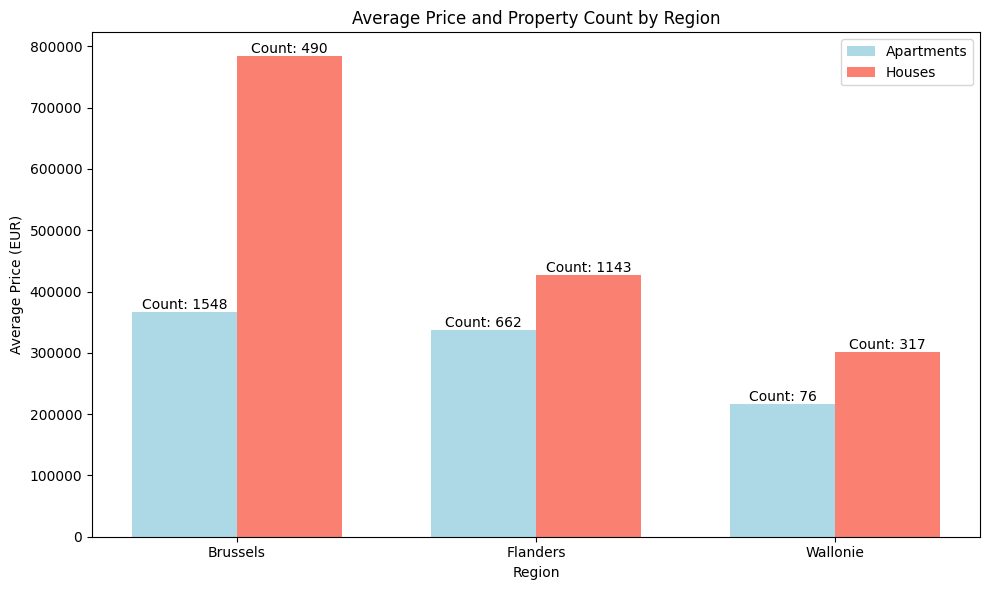

In [207]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Group by Region and calculate the average price and number of properties for apartments and houses
apartments_grouped = apartments_df.groupby('Region').agg(Average_Price=('Price', 'mean'), Property_Count=('Price', 'size'))
houses_grouped = houses_df.groupby('Region').agg(Average_Price=('Price', 'mean'), Property_Count=('Price', 'size'))

# Step 2: Combine the data into a single DataFrame
regions = apartments_grouped.index
apartment_avg_price = apartments_grouped['Average_Price']
house_avg_price = houses_grouped['Average_Price']
apartment_count = apartments_grouped['Property_Count']
house_count = houses_grouped['Property_Count']

# Step 3: Create the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(regions))

bar1 = ax.bar(index, apartment_avg_price, bar_width, label='Apartments', color='lightblue')
bar2 = ax.bar(index + bar_width, house_avg_price, bar_width, label='Houses', color='salmon')

# Step 4: Add text labels (count) above the bars
for i, rect in enumerate(bar1):
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(),
            f'Count: {apartment_count[i]}', ha='center', va='bottom', fontsize=10)

for i, rect in enumerate(bar2):
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(),
            f'Count: {house_count[i]}', ha='center', va='bottom', fontsize=10)

# Step 5: Customize the plot
ax.set_xlabel('Region')
ax.set_ylabel('Average Price (EUR)')
ax.set_title('Average Price and Property Count by Region')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(regions)
ax.legend()

plt.tight_layout()
plt.show()


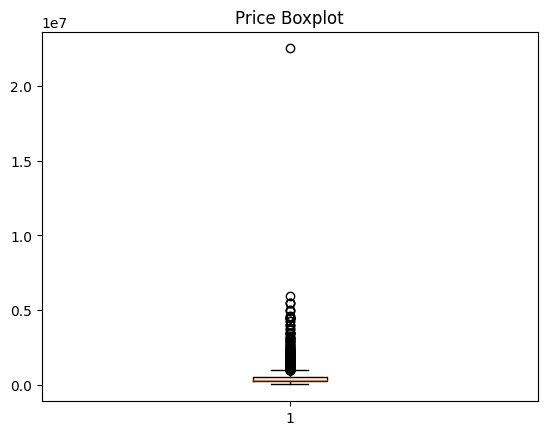

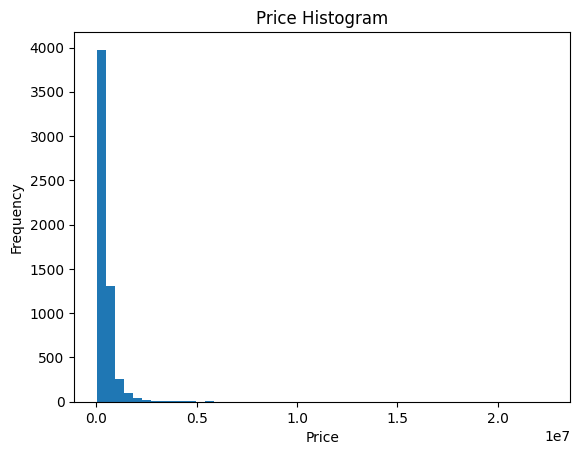

In [208]:
import matplotlib.pyplot as plt

# Visualizing with a boxplot
plt.boxplot(data['Price'])
plt.title('Price Boxplot')
plt.show()

# Visualizing with a histogram
plt.hist(data['Price'], bins=50)
plt.title('Price Histogram')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()
